In [1]:
# -*- coding: utf-8 -*-

# 泰坦尼克号生还分析 
[泰坦尼克号数据](https://www.kaggle.com/c/titanic/data) ：数据集就是来自 Kaggle，包括泰坦尼克号上 2224 名乘客和船员中 891 名的人口学数据和乘客基本信息。

## 导入包

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import mpl
%matplotlib inline 
#ipython图形呈现在你的笔记本而非新窗口中

In [3]:
# matplotlib的中文显示
def set_ch():
    mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
    mpl.rcParams['axes.unicode_minus'] = False     # 解决保存图像是负号'-'显示为方块的问题
set_ch()

## 导入数据

In [4]:
filename = 'titanic-data.csv'
titanic_df = pd.read_csv(filename)

## 初识数据

In [5]:
#titanic_df.columns
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- PassengerId => 乘客ID
- Survived => 是否生还
- Pclass => 乘客等级(1/2/3等舱位)
- Name => 乘客姓名
- Sex => 性别
- Age => 年龄
- SibSp => 堂兄弟/妹个数
- Parch => 父母与小孩个数
- Ticket => 船票信息
- Fare => 票价
- Cabin => 客舱
- Embarked => 登船港口

In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


乘客的年龄、客舱、登船港口信息不全<br/>
先用平均年龄补全年龄缺失

In [8]:
# 获取平均年龄
passenger_mean_age=titanic_df['Age'].mean()
print(passenger_mean_age)
# 用平均年龄填充缺失值
titanic_df.Age.fillna(passenger_mean_age,inplace=True)

29.6991176471


In [9]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## 可视化观察数据

乘客等级、性别、年龄

In [10]:
# 获取生还乘客的数据
Survived_1 = titanic_df[titanic_df.Survived==1]
# 获取未生还乘客的数据
Survived_0 = titanic_df[titanic_df.Survived==0]

### 乘客船舱等级对生还率的影响

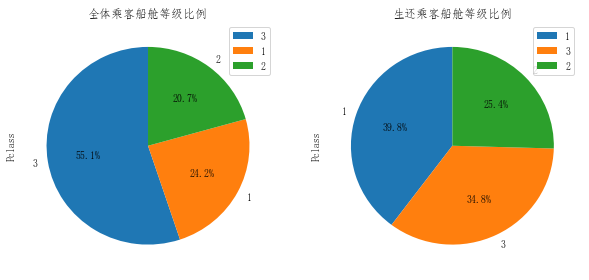

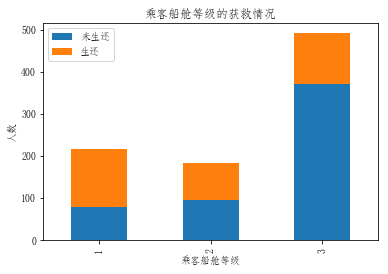

In [11]:
plt.figure(figsize=(10,10)) 
# 全体乘客船舱等级比例
plt.subplot2grid((2,2),(0,0)) 
titanic_df.Pclass.value_counts().plot.pie(title=u'全体乘客船舱等级比例', \
                                       autopct='%1.1f%%', startangle = 90, legend=True)

# 生还乘客船舱等级比例
plt.subplot2grid((2,2),(0,1)) 
Survived_1.Pclass.value_counts().plot.pie(title=u'生还乘客船舱等级比例', \
                                        autopct='%1.1f%%', startangle = 90, legend=True)
# 不同乘客船舱等级生还率
df=pd.DataFrame({u'生还':Survived_1.Pclass.value_counts(), u'未生还':Survived_0.Pclass.value_counts()})
df.plot(kind='bar', stacked=True)
plt.title(u"乘客船舱等级的获救情况")
plt.xlabel(u"乘客船舱等级") 
plt.ylabel(u"人数") 

结论一： 船舱等级越高生还率越高

### 性别对生还率的影响

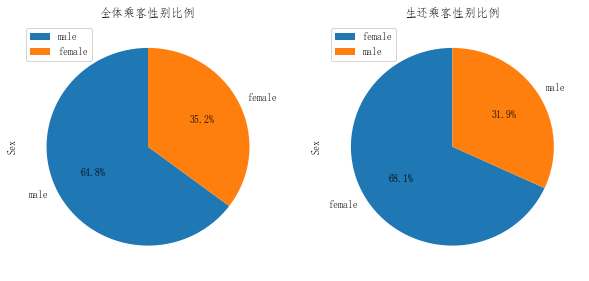

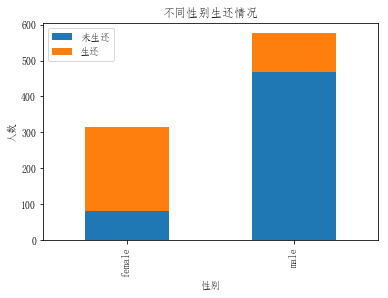

In [12]:
plt.figure(figsize=(10,10)) 
# 全体乘客性别比例
plt.subplot2grid((2,2),(0,0))
titanic_df.Sex.value_counts().plot.pie(title=u'全体乘客性别比例', \
                                       autopct='%1.1f%%', startangle = 90, legend=True)
# 生还乘客性别比例
plt.subplot2grid((2,2),(0,1)) 
Survived_1.Sex.value_counts().plot.pie(title=u'生还乘客性别比例', \
                                        autopct='%1.1f%%', startangle = 90, legend=True)
# 不同性别生还率
df=pd.DataFrame({u'生还':Survived_1.Sex.value_counts(), u'未生还':Survived_0.Sex.value_counts()})
df.plot(kind='bar', stacked=True)
plt.title(u"不同性别生还情况")
plt.xlabel(u"性别") 
plt.ylabel(u"人数") 

结论二： 女性生还率比男性要高

### 年龄对生还率的影响

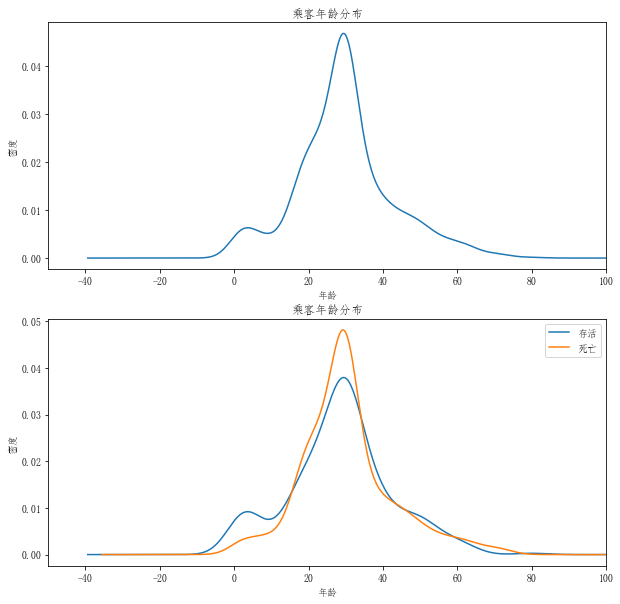

In [13]:
plt.figure(figsize=(10,10)) 
# 全体乘客年龄比例
plt.subplot2grid((2,1),(0,0)) 
#a kernel desity estimate（核密度估计）
#print(titanic_df.Age.value_counts())
titanic_df.Age.plot(kind='kde', xlim=(-50,100)) 
plt.xlabel(u"年龄")
plt.ylabel(u"密度") 
plt.title(u"乘客年龄分布")
#plt.legend((u'头等舱', u'2等舱',u'3等舱'),loc='best')

plt.subplot2grid((2,1),(1,0))
#print(Survived_1.Age.value_counts())
#print(Survived_0.Age.value_counts())
Survived_1.Age.plot(kind='kde',xlim=(-50,100))   
Survived_0.Age.plot(kind='kde')
plt.xlabel(u"年龄")# plots an axis lable
plt.ylabel(u"密度") 
plt.title(u"乘客年龄分布")
plt.legend((u'存活', u'死亡'),loc='best')

结论三： 0到15岁的孩子生还率比其他年龄段高

## 参考
- [数据分析 - 泰坦尼克号生还分析](http://www.cnblogs.com/msdynax/p/6099814.html)<br/>
- [机器学习系列(3)_逻辑回归应用之Kaggle泰坦尼克之灾](http://blog.csdn.net/han_xiaoyang/article/details/49797143)<br/>
- [Matplotlib输出中文显示问题](https://my.oschina.net/u/1180306/blog/279818)